In [73]:
%matplotlib inline

import json

from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np

plt.style.use("ggplot")

In [74]:
with open("../matches/train.json", "r") as f:
    human_data = json.load(f)
with open("../matches/test.json", "r") as f:
    human_data.extend(json.load(f))
len(human_data)

2000

In [75]:
human_bidding_length = []
human_contract_rank = []
for d in human_data:
    bidding = d["bidding"].replace("XX", "Pass").replace("X", "Pass").split(" ")
    human_bidding_length.append(len([None for b in bidding if b]))
    human_contract_rank.append(int(d["contract"][0]))

In [76]:
generated_bidding_length = []
generated_contract_rank = []
with open("../data/100k/train.txt", "r") as f:
    for line in f:
        hands, bid = line.split(" || ")
        bidding = bid[2:].split(".")
        generated_bidding_length.append(len(bidding))
        generated_contract_rank.append(int(bidding[-4].split("_")[-1]))

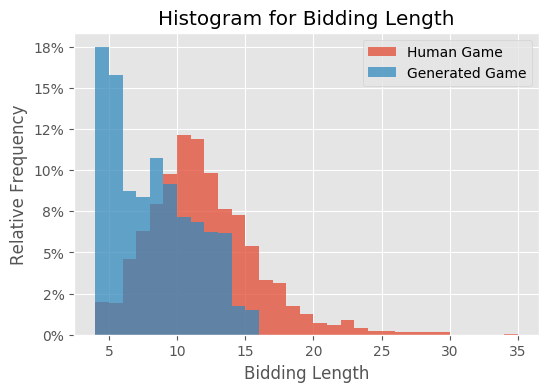

In [77]:
bins = np.linspace(4, 35, 32)
fig, ax = plt.subplots(dpi=100)
for l in (human_bidding_length, generated_bidding_length):
    ax.hist(l, bins, alpha=.75, weights=np.ones_like(l) / len(l) * 100)
ax.legend(["Human Game", "Generated Game"])
ax.set_title("Histogram for Bidding Length")
ax.set_xlabel("Bidding Length")
ax.set_ylabel("Relative Frequency")
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.show()

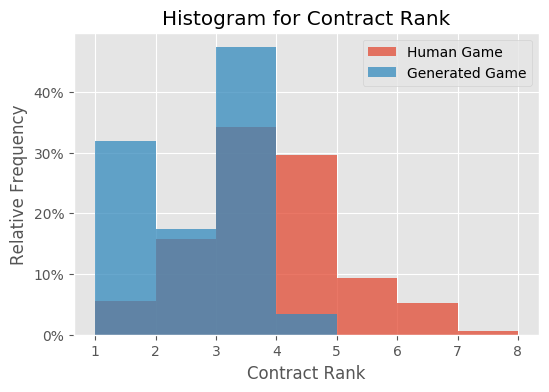

In [79]:
bins = np.linspace(1, 8, 8)
fig, ax = plt.subplots(dpi=100)
for r in (human_contract_rank, generated_contract_rank):
    ax.hist(r, bins, alpha=.75, weights=np.ones_like(r) / len(r) * 100)
ax.legend(["Human Game", "Generated Game"])
ax.set_title("Histogram for Contract Rank")
ax.set_xlabel("Contract Rank")
ax.set_ylabel("Relative Frequency")
# ax.set_xticks(np.arange(1, 8) + .5)
# ax.set_xticklabels(np.arange(1, 8))
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.show()